# Introduction

The aim of this notebook is to centralise all of my ML learning.

I will use this notebook as reference for my future projects.

As my development will be on-going, so will this notebook - by proxy.

## Contents

1. __Linear Regression__ - Supervised
    1. Single Variable
    2. Multi Variable
2. __Saving a Model__
3. __Gradient Descent__
4. __Training & Testing a Model - Train/Test Split__
5. __Logistic Regression__ - Supervised
    1. Binary
    2. Multiclass
6. __Confusion Matrix__
7. __Decision Tree__ - Supervised
9. __Random Forest__ - Supervised
9. __Support Vector Machine__ - Supervised
10. __K Fold Cross Validation__
11. __K Means Clustering__ - Unsupervised

#### ** I want to have an interactive table of contents for easy future reference ** - but can't implement it. 


The required libraries for each topic can be found on the beginning of each topic's section. 

In [1]:
## General libraries

# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Basic Libraries for: Cleaning & Manipulation
import math
import numpy as np
import pandas as pd

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sn
from word2number import w2n

# SciKit Libraries - General ML
from sklearn import metrics

# ----------------------------------------------------------------------------------------------------------------

## 1. Linear Regression

###### What is linear regression?

The modelling of a relationship between a response variable and one or more explanatory valuable. 

*Using the explanatory variable(s) to predict a respone variable*

*e.g. I have 9 years of experience (explanatory 1), and I scored a 10 in the interview (explanatory 2) - what is the amount of money that I'll earn? (response)*

###### Formula:
y = mx + b

- m : Coefficient 
- b : Y-intercept

__Relevant Documentation__:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### 1.1 Linear Regression: Single Variable

This example will look at data (unofficial) from 1970 and the mean per capita income (USD).

Our model will take in a year and predict a mean income for that given year.

In [2]:
# Required libraries for Linear Regression
import statsmodels.api as sm # OLS
from sklearn.linear_model import LinearRegression

In [3]:
# This is the dataset that we'll use for the single vairable linear regression
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


##### Manipulation - Year & Income Per Capita

In [4]:
# Renaming the column names to be more accessible
df = df.rename(columns={"per capita income (US$)" : "per_capita_income"})
df.columns

Index(['year', 'per_capita_income'], dtype='object')

#### OLS Linear Regression

In [5]:
#Respons variable
y = df['per_capita_income']

#Explanatory variable
x = df['year']

x = sm.add_constant(x)

# Fit model
model = sm.OLS(y, x)
model = model.fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      per_capita_income   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     367.5
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           2.80e-23
Time:                        22:12:34   Log-Likelihood:                -455.71
No. Observations:                  47   AIC:                             915.4
Df Residuals:                      45   BIC:                             919.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.632e+06   8.61e+04    -18.951      0.0

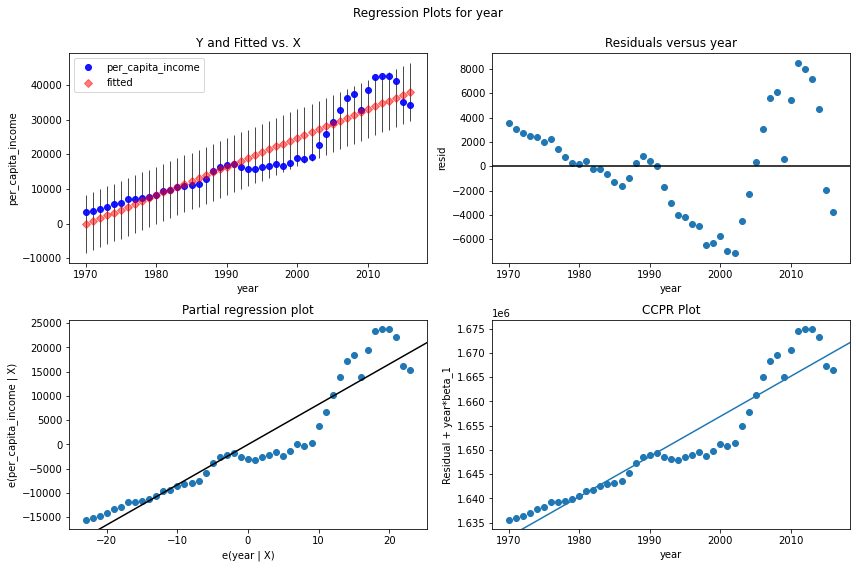

In [6]:
# Define figure size
fig = plt.figure(figsize=(12,8))

# Droduce residual plots
fig = sm.graphics.plot_regress_exog(model, 'year', fig=fig)

C:\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


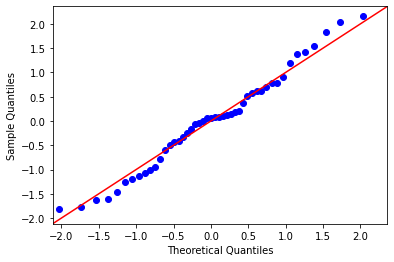

In [7]:
#define residuals
res = model.resid

#create Q-Q plot
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

#### Using Sci-Kit 

In [8]:
# Using Sklearn
reg = LinearRegression() # Just a variable to store the model - I change it later in the notebook 
reg.fit(df[['year']],df[['per_capita_income']])

LinearRegression()

In [9]:
# Predict income for ny year
# Can do print(reg.predict([[x]]))
reg.predict([[2034]])

array([[52887.20514754]])

In [10]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

### 1.2 Linear Regression: Multiple Variable 

This example looks at data containing: Experience (years), test score (/10), interview score (/10) and salary ($) 

Our model will take in an experience year, test score and interview score to predict a salary.

In [11]:
# This is the dataset that we'll use for the multi vairable linear regression
df2 = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


##### Manipulation - Experience, Test Score, Interview Score & Salary

In [12]:
# Filling in the null values - to use the values in the LR, we need to convert the words to numbers
df2.experience = df2.experience.fillna("zero")
df2.experience = df2.experience.apply(w2n.word_to_num)

In [13]:
# Since the "Test Score (Out of 10)" are floats, we need to find the mean to find the interger mean.
mean_test_score = math.floor(df2['test_score(out of 10)'].mean())
df2['test_score(out of 10)'] = df2['test_score(out of 10)'].fillna(mean_test_score)
df2

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


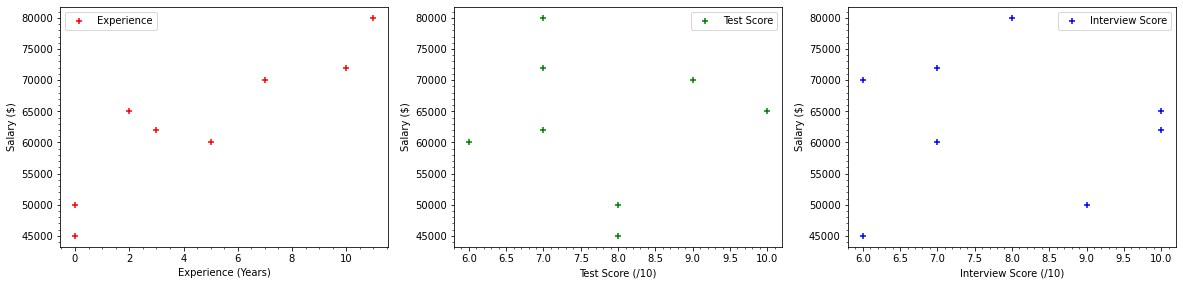

In [14]:
# Let's see what our data looks like
%matplotlib inline

# Set graph size
plt.figure(figsize=(20,15))

#Plotting data - Experience 
plt.subplot(331)

plt.scatter(df2['experience'], df2['salary($)'], color='red', marker = '+', label = 'Experience') # , s = x : set marker size
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.minorticks_on()
plt.legend()

# Plotting data - Test Score
plt.subplot(332)

plt.scatter(df2['test_score(out of 10)'], df2['salary($)'], color='green', marker = '+', label = 'Test Score')
plt.xlabel('Test Score (/10)')
plt.ylabel('Salary ($)')
plt.minorticks_on()
plt.legend()

# Plotting data - Interview Score
plt.subplot(333)

plt.scatter(df2['interview_score(out of 10)'], df2['salary($)'], color='blue', marker = '+', label = 'Interview Score')
plt.xlabel('Interview Score (/10)')
plt.ylabel('Salary ($)')
plt.minorticks_on()
plt.legend()

##### Multi Variable Linear Regression

In [15]:
# Creating the model
reg2 = LinearRegression()

# Use this format for multiple variables - reg.fit(df[['col1', 'col2', 'col3']], df['response variable'])
# Since the response variable column in this example will have invalid syntax - we need to put it in it's own s.brackets.
## "($)" - flags an error
reg2.fit(df2[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']],df2['salary($)'])

LinearRegression()

In [16]:
# Use - modelname.predict([[1,2,3]]) - to use the model to predict
    # The explanatory values should be in the order of how the model was fitted
reg2.predict([[3, 8, 9]])

array([60857.27438577])

In [17]:
# Multi variable prediction
    # modelname.predict([[x,x..], [x,x...]]) 
        # As long as the brackets open like ([[]]), then you can include as many variables as you want
        
reg2.predict([[4,7,9], [1,9,9], [6, 8, 9]])

array([61558.23430121, 57234.04545532, 69624.08143084])

# ----------------------------------------------------------------------------------------------------------------

## 2. Saving A Model

Here we'll look at how we go about saving a model.

It makes sure our model is safely stored, and so that we can easily share our model.

In [18]:
# Required library for saving a model
import joblib

In [19]:
# joblib.dump(model_variable_name, "model_save_name")
joblib.dump(reg2, '(01) practice_model_regression_multi')

['(01) practice_model_regression_multi']

In [20]:
# new_model_variable = joblib.load("model_save_name")
prac = joblib.load('(01) practice_model_regression_multi')

In [21]:
prac.predict([[1,9,8]])

array([55086.56288895])

# ----------------------------------------------------------------------------------------------------------------

## 3. Gradient Descent & Cost Function

We can use this method to find the best coefficient (m) and y-intercept (b); this will allow us to get the best score for our model - with the lowest cost function.

We can substitute these values in the formula:
    
    - y = (m * x) + b

Formulas:

- **mse or cf = (1/n) * sum([val ** 2 for val in (y - y_predicted])])** - Mean Squared Error / Cost Function
- **mse or cf = (1/n) * sum((y - y_predicted)**2)** - Mean Sqaured Error / Cost Function


- **partial derivative of *m* = -(2/n) * sum(x*(y - y_predicted))** - Partial Derivative (m) 
- **partial derivative of *b* = -(2/n) * sum(y - y_predicted)** - Partial Derivative (b)


- **m = m - learning_rate * m_pderivative** - Position of m (y = **m** * x + b), learning_rate and m_pderivative are variables - make sure to name them 
- **b = b - learning_rate * b_pderivative** - Position of b (y = m * x + **b**), learning_rate and m_pderivative are variables - make sure to name them 

##### Script for GD & CF - Order Is Important

This GD uses the first dataset, from the single variable linear regression

In [22]:
def gradient_descent(x,y): # Create a function to make gradient descent with x&y 
    m_gd = b_gd = 0 # future reference for; m*x = b // gd = gradient descent 
    iterations = 50 # This is a variable and can be changed - Random value to find global minima - how many steps are taken
    n = len(x) # This will be used for finding the derivative
    learning_rate = 0.001 #This is a variable for the learning rate - steps taken in the gradient descent
    
    for i in range(iterations): # For loop for how many steps are taken and takes into account the following:
                                # Cost - if it's reducing, 
        y_predicted = m_gd * x + b_gd # y = m*x +b
        cost = (1/n) * sum([val ** 2 for val in (y - y_predicted)]) # Finds cost - if you're reducing the cost the GD is working
        m_d = -(2/n) * sum(x*(y - y_predicted)) # Caculating patrial derivative of m - Partial derivative because for GD the "steps" are smaller
        b_d = -(2/n) * sum(y-y_predicted) # Calculating partial derivative of b - Partial derivative because for GD the "steps" are smaller
        m_gd = m_gd - learning_rate * m_d 
        b_gd = b_gd - learning_rate * m_d
        print("m {}, b {}, cost {}, interations {}".format(m_gd,b_gd, cost, i)) # Print each value increment at each iteration,
                                                                         # Format it route to from the interations and m/b values
                                                                         # "i" is important as it counts each increment of the iterations - otherwise you'd get a constant xx... number

# Assign X and Y values - array makes it easier to multiply in the future.
x = np.array(df['year'])
y = np.array(df['per_capita_income'])

gradient_descent(x,y)

m 75720.54148241132, b 75720.54148241132, cost 499723531.6384421, interations 0
m -601709648.3039906, b -601709648.3039906, cost 2.279232062602457e+16, interations 1
m 4782058623553.389, b 4782058623553.389, cost 1.4396083930024966e+24, interations 2
m -3.800518137180091e+16, b -3.800518137180091e+16, cost 9.092853566237402e+31, interations 3
m 3.02044354703682e+20, b 3.02044354703682e+20, cost 5.743227559585894e+39, interations 4
m -2.400483010878487e+24, b -2.400483010878487e+24, cost 3.6275370059473965e+47, interations 5
m 1.9077723505772253e+28, b 1.9077723505772253e+28, cost 2.2912246803723414e+55, interations 6
m -1.516192918313967e+32, b -1.516192918313967e+32, cost 1.4471831789283914e+63, interations 7
m 1.2049870441040175e+36, b 1.2049870441040175e+36, cost 9.140697424021027e+70, interations 8
m -9.576576693638563e+39, b -9.576576693638563e+39, cost 5.7734466938299645e+78, interations 9
m 7.610938359701117e+43, b 7.610938359701117e+43, cost 3.6466240134916314e+86, interations 

C:\Users\ssc44611\AppData\Local\Temp/ipykernel_22336/281352699.py:10: RuntimeWarning: overflow encountered in double_scalars
  cost = (1/n) * sum([val ** 2 for val in (y - y_predicted)]) # Finds cost - if you're reducing the cost the GD is working


# ----------------------------------------------------------------------------------------------------------------

## 4. Training & Testing Model - Train/Test Split

This allows us to, as is stated in the topic name; train our model and then test our model.

Using this method also allows us to get a better understanding of the relationship between our variables (model score) 

How? We are able to split our data into 4 groups:
    - x_train = the explanatory set to predict the response variables
    - y_train = the response set - the set that we aim to predict in the testing phase
    
    - x_test  = the explanatory set that we use to test our fitted, trained model. 
    - y_test  = the reponse set that we use to test our fitted, trained model. 

80% of the data is used for training the model, 20% of the data is used to test the model. 

__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

------------------




The dataset used for training/testing is the 2nd dataset, from the multi variable dataset.

In [23]:
# Required library for splitting data into training and testing. 
from sklearn.model_selection import train_test_split # Allows us to split our data into training and testing sets

In [24]:
# Splitting the dataset 
x_df2 = df2[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y_df2 = df2[['salary($)']]

# If using a single column for "x" - do:
    ## x = x.values.reshape(-1,1) # Reshapes the data to make it usable

In [25]:
# Syntax to split data into train & test data
x_train, x_test, y_train, y_test = train_test_split(x_df2,y_df2,test_size=0.3) #Can add ,random_state = 10) to keep samples the same

In [26]:
# Doing LR with the split data
## e_t_i = experience, test score, interview score 
e_t_i = LinearRegression() # This is just a classifier to fit the model later on (just a variable to store model)

In [27]:
# Fit the model with train data
e_t_i.fit(x_train, y_train)

LinearRegression()

In [28]:
# Check the score of the model - how accurate the model is
e_t_i.score(x_test,y_test) 

-3.429391663317344

In [29]:
# Test our trained model using the test data 
e_t_i.predict(x_test)

array([[54002.87264603],
       [66585.06224066],
       [57801.4682413 ]])

In [30]:
# Since we know it's a high scoring model, we can input any variables we want
e_t_i.predict([[1, 8, 10]])

array([[55556.97414619]])

# ----------------------------------------------------------------------------------------------------------------

## 5. Logistic Regression

###### What is logistic regression?

Logistic regression is a __classification model__ based on linear data.

#### If you data can seperate your data into two parts, use a Logistic Regression model

Binary - predicts a reponse variable based on one explanatory variable.
    - e.g. if a person will buy a new smartphone based on age; If I'm x years old, am I likely to buy a new phone?
    
Multiclass - predicts a response variable based on multiple explanatory varibles. 
    - e.g. Fraud: When a purchase happens, purchase amount, type of purchase etc. If it breaks usual trends, is it likely to be fraud?

##### Formula:
Sigmoid(x) = 1 / 1 + e^(-x)   | e = Euler's number = ~2.71828
        - Get your linear regression formula (m*x + b) and replace x in the Sigmoid formula
            - Sigmoid = 1 / 1 + e^(mx+b)
    
__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 5.1 Logistic Regression - Binary

This example will look at a range of people of different ages and if they buy life insurance.

Our model should take in a given age and print a chance of us buying life insurance.

In [31]:
# Import Logistic Regressions
from sklearn.linear_model import LogisticRegression

In [32]:
# This is the dataset that we'll use for the single vairable logistic regression
df3 = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv')
df3_cols = list(df3.columns)

print(f"The columns in this dataset are: {df3_cols}")
print(f"The shape of this dataset is: {df3.shape[0]} rows and {df3.shape[1]} columns.")

The columns in this dataset are: ['age', 'bought_insurance']
The shape of this dataset is: 27 rows and 2 columns.


In [33]:
df3.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


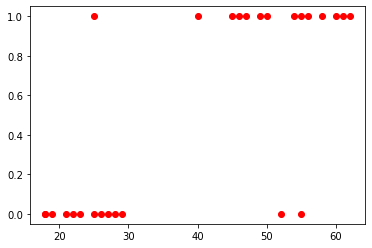

In [34]:
# Visualising how our data looks
plt.scatter(df3['age'], df3['bought_insurance'], color='red')

In [35]:
##Split Data
bi_log_xtrain, bi_log_xtest, bi_log_ytrain, bi_log_ytest = train_test_split(df3[['age']], df3.bought_insurance, test_size = 0.2)
log_xtrain = bi_log_xtrain.sort_values(by="age")

In [36]:
## Assign model to a variable
bi_log_model = LogisticRegression() 

In [37]:
# Fitting Model
bi_log_model.fit(bi_log_xtrain, bi_log_ytrain)

LogisticRegression()

In [38]:
bi_log_model.predict(bi_log_xtest) 

array([0, 1, 0, 0, 1, 1], dtype=int64)

In [39]:
# Testing model accuracy
bi_log_model.score(bi_log_xtest, bi_log_ytest)

0.8333333333333334

In [40]:
bi_log_model.predict_proba(bi_log_xtest)

array([[0.53196519, 0.46803481],
       [0.33301941, 0.66698059],
       [0.89338253, 0.10661747],
       [0.82320279, 0.17679721],
       [0.25978216, 0.74021784],
       [0.14777207, 0.85222793]])

In [41]:
# Predicting probablity if someone gets insurance by age. 0 = Won't Get, 1 = Will Get
# Remember to use; ([[x]]) - when predicting with random int. 
print(bi_log_model.predict([[16]]))
print(bi_log_model.predict([[56]]))

[0]
[1]


Our model is 100% accurate, above we can see that; 
- If the individual is 16 - they won't get the life insurance.
- If the individual is 56 - they will get the life insurance.

### 5.2 Logistic Regression - Multiclass

This example will look at a dataset containing images of handwritten digits, spanning from 0 - 9.
    - Image classification of 8x8 (pixel) images.

We will create a logistic regression model to guess what digit is being predicted.

*Documentation for this data can be found on: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html*

In [42]:
# Importing our data
from sklearn.datasets import load_digits # This is a pre-defined dataset from the SciKit library

This dataset contains 1797 8x8 images of hand-written digits. 

In [43]:
# Storing the SciKit dataset into a callable variable
digits = load_digits()

# Printing what the data looks like in its raw form and what the shape of the data is.
print(f"The 2d array looks like: {digits.data[1]}")
print("-----------------------------------------")
print(f"The data's shape is {digits.data[1].shape} - since each image is 8x8")

The 2d array looks like: [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
-----------------------------------------
The data's shape is (64,) - since each image is 8x8


<Figure size 432x288 with 0 Axes>

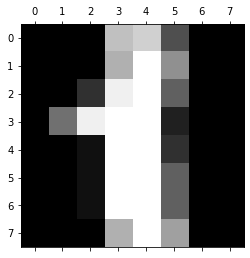

In [44]:
# Visualising the data
plt.gray() # Setting the colormap of the image to gray

plt.matshow(digits.images[1]) # Matshow plots the 2d array as an image

The number; '1', is printed

<Figure size 432x288 with 0 Axes>

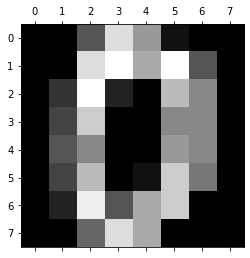

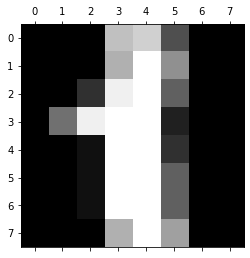

In [45]:
# Visualising a range of data
plt.gray()

# Creating a for loop to select a range of 2
for i in range(2):
    plt.matshow(digits.images[i])

We selected a range of 2 numbers, so we printed the sequence of; '0' and '1'.

In [46]:
# .target - synonymous with our response variable - what we want to predict
## Random input
print(f"{digits.target[0:2]}")
print(f"{digits.target[1003]}")

[0 1]
5


In [47]:
# Splitting data into training and testing sets
## .data - is our general dataset
## .target - is our desired response variable
mu_log_xtrain, mu_log_xtest, mu_log_ytrain, mu_log_ytest = train_test_split(digits.data, digits.target, test_size = 0.2)

In [48]:
print(f"The size of our training set is: {len(mu_log_xtrain)} - 80% of our total dataset")
print(f"The size of our testing set is:  {len(mu_log_xtest)}  - 20% of our total dataset")

The size of our training set is: 1437 - 80% of our total dataset
The size of our testing set is:  360  - 20% of our total dataset


In [49]:
# Storing the model into our variable
mu_log_model = LogisticRegression()

In [50]:
# Fitting our model
mu_log_model.fit(mu_log_xtrain, mu_log_ytrain)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# Getting the score of our model
mu_log_model.score(mu_log_xtest, mu_log_ytest)

0.9472222222222222

<Figure size 432x288 with 0 Axes>

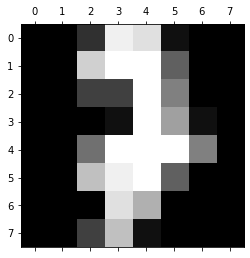

In [52]:
# Testing our model with a random input
plt.gray()

plt.matshow(digits.images[147])

In [53]:
# What is this number?
digits.target[147] # It is 7

7

In [54]:
# Using our model to predict the number
mu_log_model.predict([digits.data[147]]) # Our model accurately predicted the number 7

array([7])

# ----------------------------------------------------------------------------------------------------------------

## 6. Confusion Matrix
 
Visualising our model's success and failiure - seeing where it works and where it doesn't

We will use our Multiclass Logistic Regression model for this confusion matrix

#### A confusion matrix should be used with every model, to visualise how well the model is working.

Syntax:
- variable = confusion_matrix(*y_true*, *y_predicted*)

__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [55]:
# Library for confusion matrix
from sklearn.metrics import confusion_matrix

In [56]:
# Creating our Confusion Matrix
mu_log_y_predicted = mu_log_model.predict(mu_log_xtest) # This will be our predicted array

mu_log_cm = confusion_matrix(mu_log_ytest, mu_log_y_predicted)
mu_log_cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 26,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  1,  0],
       [ 0,  2,  0,  0,  0,  2,  0,  1, 37,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0,  3, 36]], dtype=int64)

Text(114.0, 0.5, 'True Values')

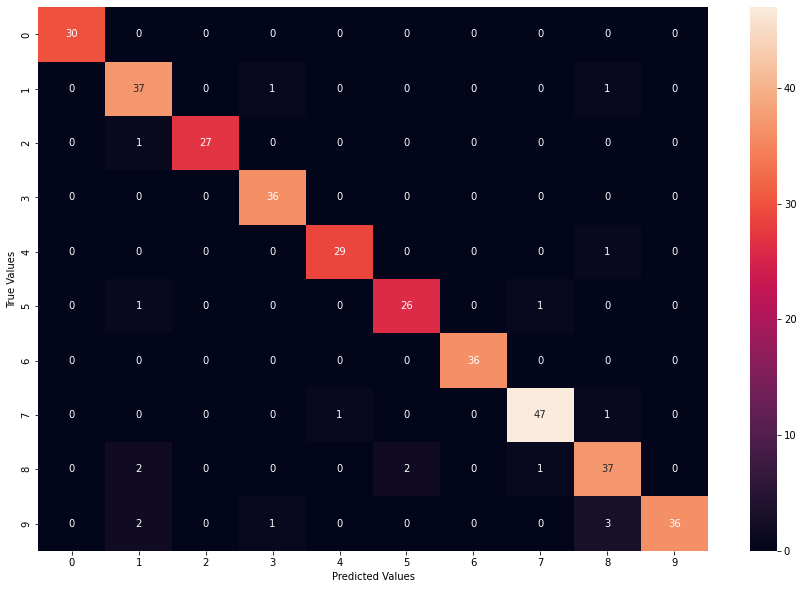

In [57]:
# Visualising the Confusion Matrix

# Setting graph size
plt.figure(figsize=(15,10))

# Plotting Confusion Matrix
sn.heatmap(mu_log_cm, annot=True)

# Setting graph labels
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

#### What this graph shows is:
- Where the 'True values' and 'Predicted values' match, it shows that our model is working in these regions
    - e.g. when the true value is '4', our model also predict '4' - 38 times
    
    
- The heatmap lets us know where it lacks proficiency
    - the *brighter* the colour, the more accurate our model is - when the 'True' value was '3', our model predicted '3' - 40 times (*accuracy*)
    - the *darker* the color, the less accurate our model is - when the 'True' value was '8', our model predicted '1' - 2 times (*inaccuracy*)

# ----------------------------------------------------------------------------------------------------------------

## 7. Decision Tree

Decision trees models are in an odd spot, they're kind of *hybrid* models. 

Being both a __classification__ or a __regression__ model, based on its context. 

#### If your data can't be seperated into two parts, use a Decision Tree models

__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [58]:
# Importing Decision Tree
from sklearn import tree

# Label Encoding - Converting labels to numbers - won't need it for this example
## from sklearn.preprocessing import LabelEncoder

In [59]:
# Importing data from scikit
from sklearn.datasets import load_wine

In [60]:
# Storing data into a variable
wine = load_wine()

# Printing data details
print(f"Our data looks like {wine.data[1]}")
print("-----------------------------------------")
print(f"The data's shape is {wine.data.shape[0]} rows and {wine.data.shape[1]} columns.")
print("-----------------------------------------")
print(f"Our data's target names are: {wine.target_names}")
print("-----------------------------------------")
print(f"Our data's target names are: {wine.feature_names}")

Our data looks like [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]
-----------------------------------------
The data's shape is 178 rows and 13 columns.
-----------------------------------------
Our data's target names are: ['class_0' 'class_1' 'class_2']
-----------------------------------------
Our data's target names are: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [61]:
# Split our data into testing and training sets
## .data = our general data
## .target = our desired response value
wine_xtrain, wine_xtest, wine_ytrain, wine_ytest = train_test_split(wine.data, wine.target, test_size = 0.2)

In [62]:
# Calling our decision tree model
wine_tree = tree.DecisionTreeClassifier()

In [63]:
# Fitting our model
wine_tree.fit(wine_xtrain, wine_ytrain)

DecisionTreeClassifier()

In [64]:
# Check our model score
wine_tree.score(wine_xtest, wine_ytest)

0.9722222222222222

In [65]:
# Let's test our model
## What class of wine is wine #47?
wine.target[47] ## The true class of this wine is: Class 0 

0

In [66]:
# Let's see what our model predicts
wine_tree.predict([wine.data[47]]) ## Our model predicted: Class 0

array([0])

## 8. Random Forest

As Random forest models build upon decision trees, this model type is both a __classification__ and __regression__ model.
- Random forest models are a level above decision tree models.
    - They are essentially multiple decision trees in a single model - hence the Random **forest**

This example will look at a dataset containing images of handwritten digits, spanning from 0 - 9.
- 8x8 pixel images

We looked at this data in the logistic regression example.

__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [67]:
# Storing out digits data into a variabe
digits_rf = load_digits()

# Properties of this data
print(dir(digits_rf)) 
print(digits.data[0]) # What does the data look like?

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [68]:
# Converting this array into a dataframe
df_digits_rf = pd.DataFrame(digits_rf.data) 
df_digits_rf.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [69]:
# Splitting out data
rf_xtrain, rf_xtest, rf_ytrain, rf_ytest = train_test_split(df_digits_rf, digits.target, test_size=0.2)
# df_digits_rf is our input and we want to target the number each cell represents

In [70]:
# Importing the random forest model
from sklearn.ensemble import RandomForestClassifier # Ensemble - using multiple algorithms - RF uses multiple decision trees 
rf = RandomForestClassifier(n_estimators=40)

# Fitting our model
rf.fit(rf_xtrain, rf_ytrain)

RandomForestClassifier(n_estimators=40)

**n_estimators** = how many _trees_ the random forest model is using.
- In this example we're using 40 different trees - gives us the best score in this case

In [71]:
# Let's see the model score
rf.score(rf_xtest, rf_ytest)

0.975

In [72]:
# True value
digits.target[100]

4

In [73]:
# Predicted value
## Using .values[x] - we're able to extract all of the data and predict it as an array
rf.predict([df_digits_rf.values[100]])

array([4])

**Here, you should now add a confusion matrix to visualise the model's accuracy**

## 9. Support Vector Machine

SVM is a **classification** model.

SVM models draw a hyperplane (the term for splitting data/classification boundary on an nDimension). With the goal of:
- Maximising margin between classification groups. Having the data points/support vectors have the most amount of space between the boundary.
    - Margin is the length between the data points and the classification boundary. The higher the boundary = the better the data split.
    
__Gamma__:

Parameter the model takes to fit the boundary.
- High gamma: the model *only* looks at the data points closest to the boundary.
    - Lower margin, very accurate, lower generalization
- Low gamma: the model looks at data points both close and far to the boundary.
    - Higher margin, less accurate, higher generalization.

__Regularization__:

Paramater the model takes to fit the boundary. 
- High regularization: model tries is best to lower errors, can be viewed as over-fitting the model. 
    - Higher accuracy, lower gerneralization.
- Low regularization: model accepts errors and plots a plane that can missclassify.
    - Lower accuracy, higher generalization.
- In the SVM pakage Regularization is "*__C__*"

__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### 10. K-Fold Cross Validation

__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=k%20fold#sklearn.model_selection.KFold

### 11. K-Means Clustering


__Relevant Documentation__: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html